#**Leitura dos dados do radar Banda-S de Quixeramobim-CE (RMT0100DS) da  `FUNCEME`**

# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando o matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando o arm_pyart
!pip install -q arm_pyart==1.15.1

# Instalando o cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

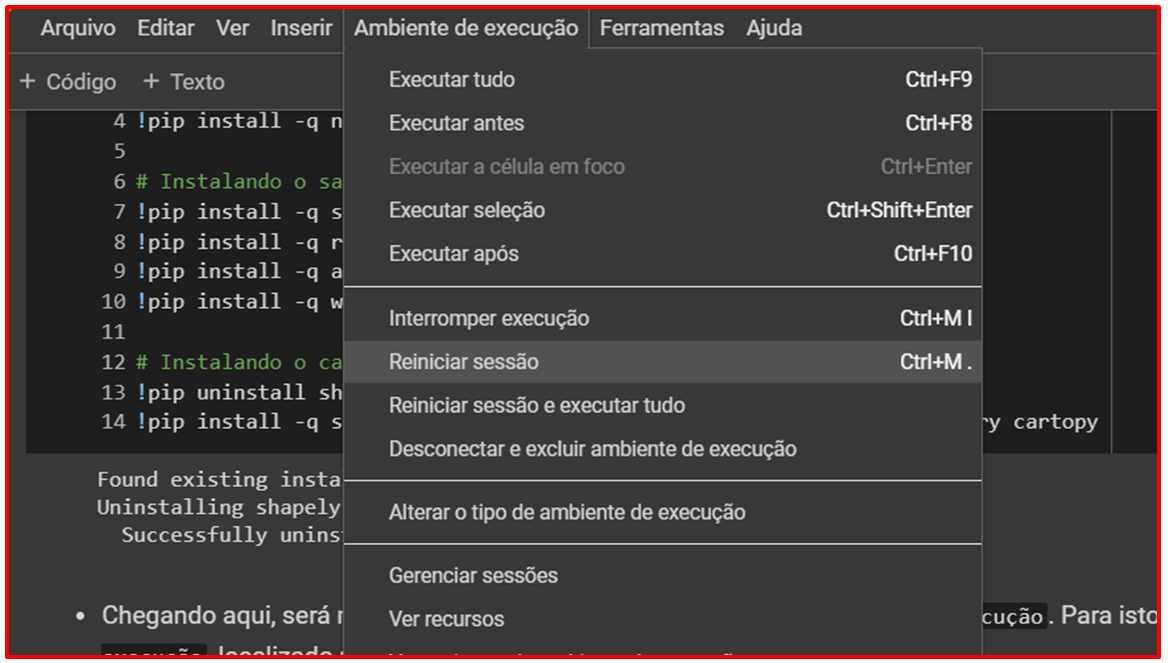

# **2° Passo:** Importando as bibliotecas

In [2]:
# importa bibliotecas
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import num2date
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# monta o drive
from google.colab import drive
drive.mount('/content/drive')

# caminho do drive
dir = '/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/MSC_SAMUEL_UFRN/'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Mounted at /content/drive


# **3° Passo:** Conhecendo os dados do radar da FUNCEME

`Leitura` do dado do radar:

In [5]:
# nome do arquivo
file = 'XXX240415010724.RAWGSZK'

# leitura do dado
radar = pyart.io.read_sigmet(f'{dir}{file}')

Utilizando as atribuições existentes dentro do objeto radar mostrado acima, mostre as informações solicitadas a seguir:

Exibindo os `campos do objeto radar`:

In [6]:
print(radar.fields.keys())

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'normalized_coherent_power'])


Mostre o valor da `latitude` do radar:

In [7]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-5.06917002])}

Mostre o valor da `longitude` do radar:

In [8]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-39.26712994])}

Mostre o valor da `altitude` do radar:

In [9]:
radar.altitude

{'long_name': 'Altitude',
 'standard_name': 'Altitude',
 'units': 'meters',
 'positive': 'up',
 'data': array([786.])}

Mostre a `data e horário do arquivo do radar`:

In [10]:
radar.time

{'units': 'seconds since 2024-04-15T01:07:24Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([ 24.,  24.,  24., ..., 282., 282., 282.])}

Mostre a `data/horário do início e fim` do scan do radar:

In [11]:
print('Início do volcan=', num2date(radar.time['data'][0], radar.time['units'] ))
print('Fim do volcan=', num2date(radar.time['data'][-1], radar.time['units'] ))

Início do volcan= 2024-04-15 01:07:48
Fim do volcan= 2024-04-15 01:12:06


Mostre a quantidade de `bins`:

In [12]:
radar.ngates

998

Mostre a `resolução radial`:

In [13]:
radar.range['meters_between_gates']

array([375.], dtype=float32)

Mostre a quantidade total de `azimutes`:

In [14]:
radar.nrays

3225

Mostre a `quantidade de azimutes para cada elevação`:

In [15]:
nsweeps = radar.nsweeps
total_azimuths = radar.azimuth['data'].shape[0]
index_azimuths = radar.sweep_start_ray_index['data'].tolist()
index_azimuths.append(total_azimuths)

for i in range(nsweeps):
  print('Numero de azimutes da elevacao ' + str(i) + ': ' + str(index_azimuths[i+1] - index_azimuths[i]))

Numero de azimutes da elevacao 0: 460
Numero de azimutes da elevacao 1: 463
Numero de azimutes da elevacao 2: 455
Numero de azimutes da elevacao 3: 462
Numero de azimutes da elevacao 4: 462
Numero de azimutes da elevacao 5: 464
Numero de azimutes da elevacao 6: 459


Mostre a quantidade de `elevações` e seus `valores`:

In [16]:
radar.nsweeps

7

In [17]:
radar.fixed_angle['data']

array([359.599    ,   0.       ,   0.5493164,   1.3018799,   2.4005127,
         3.9990234,   6.998291 ], dtype=float32)

Mostre a `dimensão dos dados`:

In [18]:
radar.fields['reflectivity']['data'].shape

(3225, 998)

# **4° Passo:** Plota PPI

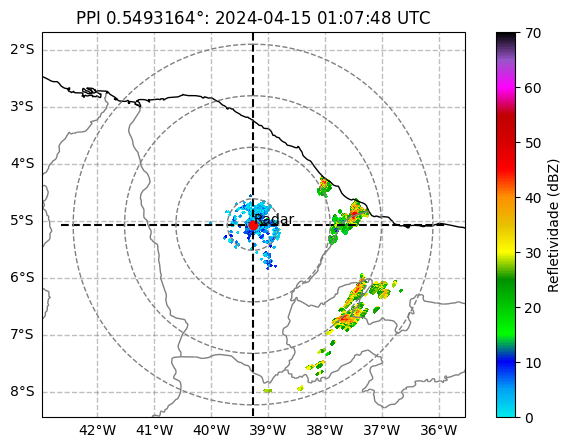

In [19]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
file = 'XXX240415010724.RAWGSZK'
radar = pyart.io.read_sigmet(f'{dir}{file}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 2 #(=terceira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# definindo a projeção do mapa
projection = ccrs.PlateCarree(central_longitude=lon_radar)

# cria moldura da figura
fig = plt.figure(figsize=[8,5])

# plota o mapa
display.plot_ppi_map('reflectivity',
                     sweep=level,
                     vmin=0,
                     vmax=70,
                     fig=fig,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     projection=projection,
                     resolution='10m',
                     cmap='pyart_NWSRef',
                     colorbar_label='Refletividade (dBZ)',
                     title=f'PPI {str_level}$\degree$: {data} UTC')

# plota as linhas transversais que passam pelo centro do radar
display.plot_line_geo(np.array([lon_radar, lon_radar]), np.array([latmin, latmax]), linestyle='--', color='black')
display.plot_line_geo(np.array([lonmin, lonmax]), np.array([lat_radar, lat_radar]), linestyle='--', color='black')

# plota aneis de distância
display.plot_range_rings([50, 150, 250, 350], ls='--', lw=1, col='gray')

# indica a localização do radar com um ponto
display.plot_point(lon_radar, lat_radar, symbol='o', label_text='Radar', color='red')

# plota as linhas de latitudes e longitudes
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# salva figura
plt.savefig(f'{dir}ppi_{str_level}graus_{data}.png', bbox_inches='tight', dpi=300)